# 2.18 Programming for Geoscientists class test - 12th December 2013

## Sample solution

# Test instructions

<span style="color:red">I have added some additional comments in red</span>

* This test contains **5** questions each of which should be answered. <span style="color:red">The way I structure the exam is to give 5 questions that are worth 20% each. They increase in difficulty as you move from 1 through to 5 - it only makes sense that the last 20% is harder to obtain then the first 20%. Because of the clear cut nature of the questions it is possible to get 100%, and every year a few students manage just that.</span>
* Write your program in a Python cell just under each question.
* You can write an explanation of your solution as comments in your code. <span style="color:red">There can never be too many comments. Make sure you explain everything. Do not leave me guessing. Even if you make an error in the code I may give you the benefit of the doubt if you have expained what you were trying to do in your comments.</span>
* In each case your solution program must fulfil all of the instructions - please check the instructions carefully and double check that your program fulfils all of the given instructions.<span style="color:red">Read this line again. And go back and read it again! So that an exam is marked objectively I have to partition a portion of the marks for each item asked for in the question. If you skip something then I cannot give you marks for the bit your missing - period. So read the question carefully and make sure you do everything that is asked. </span>
* Save your work regularly. <span style="color:red">The autosave is good - but you should make sure that your work is saved regularly. Lots of unusual things can happen and you do not want to be caught out.</span>
* At the end of the test you should email your IPython notebook document (i.e. this document) to [Gerard J. Gorman](http://www.imperial.ac.uk/people/g.gorman) at g.gorman@imperial.ac.uk <span style="color:red">Only some of you tested this.In 2013 2 people sent me blank documents...you have been warned.</span>

**1.** Correct the 5 errors in the following program.

In [1]:
# Part a

# Fix: Using sin without having importing math.
from math import *
x=1
print "sin(%g)=%g" % (x, sin(x))

# Part b

# Fix: Avoided integer division.
F = 114
print 5./9*(F-32)

# Part c

# Fix:
# 1. "%" cannot be converted to a float because it is an invalid literal. Remove it.
# 2. The multiplication needs to be within its own brackets. 
interest = "0.1%"
print "Growth = %g" % (42.0*float(interest[:-1]))

# Part d

# Fix:
# 1. Clearly the programmer intended to extract column 4 rather than the 4th letter. We use split to fix this.
# 2. However, this was also a weak solution because the Survey Name may have one or more words in its name.
#    To get around this we can count from the end.
# 3. Finally the programmer clearly intended to use a formatted print statement so we need to add the slot
#    and convert to an integer (could also have changed %d to %s).
# Table header:
#       Survey Name     USGS ID       Contributor    Year    Number of Tracklines   KMS Shot
line = "Beaufort Sea    W-62-77-AR    WesternGeco    1977    69                     4,987"
print "The year the data was collected was %d"% int(line.split()[-3])

# Part e

# Fix: You cannot append to a tuple. Change this to a list - i.e. change () to [].
heights = [1.56, 1.67, 1.97, 1.43]
heights.append(1.81)
print heights

sin(1)=0.841471
45.5555555556
Growth = 4.2
The year the data was collected was 1977
[1.56, 1.67, 1.97, 1.43, 1.81]


**2.** The equation $s=ut-\frac{1}{2}gt^2$ can be used to describe the height of a ball thrown vertically, where $s$ is the height, $u$ is the initial velocity, $t$ is the time and $g$ is acceleration (assumed here to be $9.81ms^{-2}$). 

* Assuming that the initial velocity is $2ms^{-1}$, plot a graph showing how the height varies from $t=0$ to the time it hits the ground, $t=\frac{2u}{g}$.
* Use 100 data points to generate your plot.
* Label both the $x$ and $y$ axis appropriately.

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


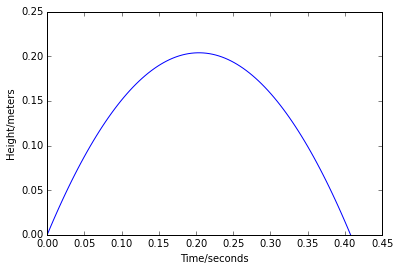

In [2]:
# Remember to inline pylab so that the graphs are part of the notebook and not a seperate window.
%pylab inline

from pylab import *

# Define a function that calculates the height.
def calc_height(u, t, g=9.81):
    return u*t-0.5*g*t**2

# Define a function to calculate the landing time.
def landing_time(u, g=9.81):
    return 2*u/g

# Initialise variables.
u_initial = 2.0 
t_start = 0
t_end = landing_time(u_initial)

# Create 100 data points for time.
time = linspace(0, t_end, 100)

# Calculate 100 corresponding data points for height.
height = calc_height(u_initial, time)

# Basic plot with axes labeled.
plot(time, height)
xlabel("Time/seconds")
ylabel("Height/meters")
show()

**3.** The Gaussian function can be defined as:
$$g(x) = ae^{\frac{(x-b)^2}{2c^2}}-d.$$

* Implement a Python function that evaluates this expression for a given input for x.
* The parameters $a$, $b$, $c$ and $d$ should be optional arguments to the function with default values 1.0, 0, 1.0 and 0.0 respectively.
* Use NumPy to create an array of 101 $x$ values uniformly spaced in the range [−1, 1].
* Use the function you created in the first part to create an array of Gaussian values.
* Plot the result.

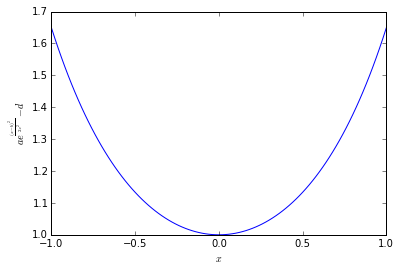

In [3]:
from numpy import *

# Define the Gaussian function
def gaussian(x, a=1.0, b=0.0, c=1.0, d=0.0):
    return a*exp((x-b)**2/(2*c**2)) - d

# Use numpy's linspace to create 101 points in the range [-1, 1]. It is an odd
# number so we can have a point centred on 0.
x = linspace(-1.0, 1.0, 101)

# Calculate the corresponding values for the Gaussian function.
g_x = gaussian(x)

# Plot graph
plot(x, g_x)

# We were not asked but out if habit I cannot resist adding labels
# on the axis - no matter how trivial. MathJax is thrown in just 
# for fun so you can see that it is possible to have beautyful
# looking equations.
xlabel(r"$x$")
ylabel(r"$a e^{\frac{(x-b)^2}{2 c^2}} - d$")

show()

**4.** The file *hpip\_yakutsk\_borehole\_data.txt* (provided with this IPython notebook file) contains permafrost borehole temperature data (in degrees Celsius) for January between the years 1915 and 2000. By looking at the header of the text file you can see that the 2$^{nd}$ column contains the temperatures at a depth of 0.80m, the 3$^{rd}$ column contains the temperatures at a depth of 3.20m and the 4$^{th}$ column gives the surface temperatures taken from the *World Monthly Surface Climatology dataset (ds570.0)*. A temperature value of "-999" indicates that the data value is missing.

* Write a program that reads in this data and plots each of the temperature profiles against the year.
* Any year that contains missing temperature data (*i.e.* has a value of -999) should be skipped.
* Label the *x* and *y* axis clearly.
* Provide a legend and locate it in the best position for the plot.

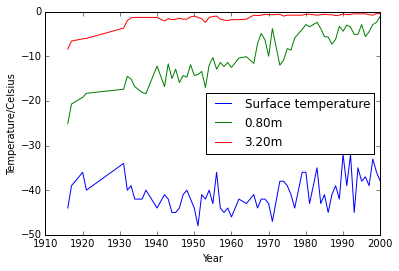

In [4]:
# Open the file in read mode.
infile = open("hpip_yakutsk_borehole_data.txt", "r")

year = []
temperature = {"Surface temperature":[], "0.80m":[], "3.20m":[]}

for line in infile:
    # Instructions are to skip any data that has a value of -999. So lets
    # check this condition first.
    if "-999.0" in line:
        continue

    # Start to splitting into columns
    words = line.split()
    
    # Use a try/except block to do the reading concisely. We will raise an 
    # exception any time something something unexpected occures.
    try:
        lyear = int(words[0])
        ldepth1 = float(words[1])
        ldepth2 = float(words[2])
        ldepth0 = float(words[3])
        
        year.append(lyear)
        temperature["Surface temperature"].append(ldepth0)
        temperature["0.80m"].append(ldepth1)
        temperature["3.20m"].append(ldepth2)
        
    except:
        continue

# Add the three plots
plot(year, temperature["Surface temperature"])
plot(year, temperature["0.80m"])
plot(year, temperature["3.20m"])

# Label the axis
xlabel("Year")
ylabel("Temperature/Celsius")

# Add a legend to explain the three plots - notice the use of loc to specify the
# location of the legend box
legend(("Surface temperature", "0.80m", "3.20m"), loc="best")
show()

**5.** Create a Python class for *Igneous Rocks*.

* The class should have the following attributes: *Rock Type*, *Grain Size*, *Usual Colour*, *Composition*, and *Notes*.
* Add a class method to initialise the class.
* Add a class method to print out a description of an object of this class.
* Demonstrate the functionality of the class using the rock *Obsidian* where the grain size is *fine*, the usual colour is *dark*, the composition is *lava glass* and we note that it has a *glassy appearance*.
* Use the class member function to print out the rock description.

In [5]:
class IgneousRocks:
    # Initialise the attributes. Using the convention that a name starting with "_"
    # should be treated as a private.
    def __init__(self, rock_type=None, grain_size=None, usual_colour=None, composition=None, notes=None):
        self._rock_type=rock_type
        self._grain_size=grain_size
        self._usual_colour=usual_colour
        self._composition=composition
        self._notes=notes
    
    # Define the string that should be printed if we try to print an instance of the class.
    def __str__(self):
        return """Rock type: %s
Grain size: %s
Usual colour: %s
Composition: %s
Notes: %s"""%(self._rock_type, self._grain_size, self._usual_colour, self._composition, self._notes)

# Demonstrate the class on some old rock.
some_old_rock = IgneousRocks(rock_type="Obsidian", grain_size="fine", \
                             usual_colour="dark", composition="Lava glass", \
                             notes="It has a glassy appearance")

# Show the __str__ in action.
print some_old_rock

Rock type: Obsidian
Grain size: fine
Usual colour: dark
Composition: Lava glass
Notes: It has a glassy appearance
